# **Loading the Dataset**

---



In [6]:
# Google Drive direct download of big files - gdown
!gdown 1xkynpL15pt6KT3YSlDimu4A5iRU9qYck

Downloading...
From: https://drive.google.com/uc?id=1xkynpL15pt6KT3YSlDimu4A5iRU9qYck
To: /content/Flowers-Dataset.zip
100% 236M/236M [00:02<00:00, 109MB/s] 


In [7]:
!pip install theano 
!pip install scikit-image
!pip install imgaug
!pip install ipyplot
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Pre-processing of the images**

---



In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
from keras.models import Sequential
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from six.moves import urllib
from IPython.display import clear_output, Image, display, HTML
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow_hub as hub
import collections
import io
import math
import os
import random
from six.moves import urllib
from IPython.display import clear_output, Image, display, HTML
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import time
import os
import cv2
import random
from numpy import *
from PIL import Image
import theano
img_width, img_height = 224, 224

In [10]:
import zipfile
zip_ref = zipfile.ZipFile("/content/Flowers-Dataset.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [11]:
data_path = "/content/flowers"
categories = ["daisy", "dandelion", "rose", "sunflower", "tulip"]

In [13]:
input_img = imageio.imread('/content/flowers/daisy/100080576_f52e8ee070_n.jpg')
input_img

Array([[[135, 135, 133],
        [138, 138, 136],
        [142, 142, 142],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[134, 134, 132],
        [137, 137, 135],
        [141, 141, 139],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[133, 133, 131],
        [136, 136, 134],
        [141, 141, 139],
        ...,
        [153, 153, 153],
        [155, 155, 155],
        [146, 146, 146]],

       ...,

       [[ 45,  48,  27],
        [ 44,  47,  26],
        [ 44,  47,  26],
        ...,
        [130, 126, 125],
        [130, 126, 125],
        [129, 125, 124]],

       [[ 44,  47,  26],
        [ 44,  47,  26],
        [ 44,  47,  26],
        ...,
        [130, 126, 125],
        [130, 126, 125],
        [130, 126, 125]],

       [[ 44,  47,  26],
        [ 44,  47,  26],
        [ 44,  47,  26],
        ...,
        [132, 128, 127],
        [132, 128, 127],
        [132, 128, 127]]

In [14]:
import splitfolders 
input_folder = "/content/flowers"
output = "/content/split" 

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

Copying files: 4317 files [00:01, 2853.87 files/s]


In [16]:
FLOWERS_DIR = '/content/flowers'
TRAIN_FRACTION = 0.8
RANDOM_SEED = 2018


def make_train_and_test_sets():
  """Split the data into train and test sets and get the label classes."""
  train_examples, test_examples = [], []
  shuffler = random.Random(RANDOM_SEED)
  is_root = True
  for (dirname, subdirs, filenames) in tf.gfile.Walk(FLOWERS_DIR):
    # The root directory gives us the classes
    if is_root:
      subdirs = sorted(subdirs)
      classes = collections.OrderedDict(enumerate(subdirs))
      label_to_class = dict([(x, i) for i, x in enumerate(subdirs)])
      is_root = False
    # The sub directories give us the image files for training.
    else:
      filenames.sort()
      shuffler.shuffle(filenames)
      full_filenames = [os.path.join(dirname, f) for f in filenames]
      label = dirname.split('/')[-1]
      label_class = label_to_class[label]
      # An example is the image file and it's label class.
      examples = list(zip(full_filenames, [label_class] * len(filenames)))
      num_train = int(len(filenames) * TRAIN_FRACTION)
      train_examples.extend(examples[:num_train])
      test_examples.extend(examples[num_train:])

  shuffler.shuffle(train_examples)
  shuffler.shuffle(test_examples)
  return train_examples, test_examples, classes


In [17]:
import random
TRAIN_EXAMPLES, TEST_EXAMPLES, CLASSES = make_train_and_test_sets()
NUM_CLASSES = len(CLASSES)

print('\nThe dataset has %d label classes: %s' % (NUM_CLASSES, CLASSES.values()))
print('There are %d training images' % len(TRAIN_EXAMPLES))
print('There are %d test images' % len(TEST_EXAMPLES))


The dataset has 5 label classes: odict_values(['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'])
There are 3452 training images
There are 865 test images


# **Image Augmentation**

---



In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trd = "/content/split/train"
tsd = "/content/split/test"
val = "/content/split/val"


train_data_dir = trd
validation_data_dir = tsd
nb_train_samples =400 
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [19]:
# Checking format of Image:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

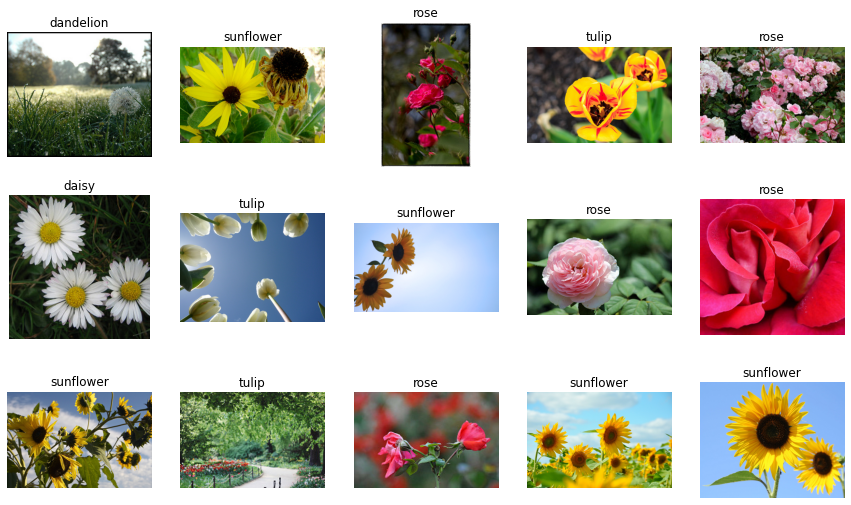

In [20]:
import io
from io import StringIO
from io import BytesIO
def get_label(example):
  return example[1]

def get_class(example):
  return CLASSES[get_label(example)]

def get_encoded_image(example):
  image_path = example[0]
  return tf.gfile.GFile(image_path, 'rb').read()

def get_image(example):
  return plt.imread(io.BytesIO(get_encoded_image(example)), format='jpg')

def display_images(images_and_classes, cols=5):
  rows = int(math.ceil(len(images_and_classes) / cols))
  fig = plt.figure()
  fig.set_size_inches(cols * 3, rows * 3)
  for i, (image, flower_class) in enumerate(images_and_classes):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.imshow(image)
    plt.title(flower_class)

NUM_IMAGES = 15
display_images([(get_image(example), get_class(example))
               for example in TRAIN_EXAMPLES[:NUM_IMAGES]])

# **Model Building**

---



In [21]:
LEARNING_RATE = 0.01

tf.reset_default_graph()
image_module = hub.Module('https://tfhub.dev/google/imagenet/mobilenet_v2_035_128/feature_vector/2')
encoded_images = tf.placeholder(tf.string, shape=[None])
image_size = hub.get_expected_image_size(image_module)


def decode_and_resize_image(encoded):
  decoded = tf.image.decode_jpeg(encoded, channels=3)
  decoded = tf.image.convert_image_dtype(decoded, tf.float32)
  return tf.image.resize_images(decoded, image_size)

batch_images = tf.map_fn(decode_and_resize_image, encoded_images, dtype=tf.float32)

features = image_module(batch_images)

Instructions for updating:
Use fn_output_signature instead


# **Add layers**

---



In [30]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [32]:
# Using DataGenerator:  
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
  
test_datagen = ImageDataGenerator(rescale=1. / 255)
  
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
  
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3452 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


# **Compiling the model**

---



In [33]:
def create_model(features):
  """Build a model for classification from extracted features."""
  layer = tf.layers.dense(inputs=features, units=NUM_CLASSES, activation=None)
  return layer


logits = create_model(features)
labels = tf.placeholder(tf.float32, [None, NUM_CLASSES])
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=labels)
cross_entropy_mean = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE)
train_op = optimizer.minimize(loss=cross_entropy_mean)
probabilities = tf.nn.softmax(logits)
prediction = tf.argmax(probabilities, 1)
correct_prediction = tf.equal(prediction, tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# **Fit The Model**

---



In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [35]:
NUM_TRAIN_STEPS = 100
TRAIN_BATCH_SIZE = 10
EVAL_EVERY = 10

def get_batch(batch_size=None, test=False):
  """Get a random batch of examples."""
  examples = TEST_EXAMPLES if test else TRAIN_EXAMPLES
  batch_examples = random.sample(examples, batch_size) if batch_size else examples
  return batch_examples

def get_images_and_labels(batch_examples):
  images = [get_encoded_image(e) for e in batch_examples]
  one_hot_labels = [get_label_one_hot(e) for e in batch_examples]
  return images, one_hot_labels

def get_label_one_hot(example):
  """Get the one hot encoding vector for the example."""
  one_hot_vector = np.zeros(NUM_CLASSES)
  np.put(one_hot_vector, get_label(example), 1)
  return one_hot_vector

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(NUM_TRAIN_STEPS):
    # Get a random batch of training examples.
    train_batch = get_batch(batch_size=TRAIN_BATCH_SIZE)
    batch_images, batch_labels = get_images_and_labels(train_batch)
    # Run the train_op to train the model.
    train_loss, _, train_accuracy = sess.run(
        [cross_entropy_mean, train_op, accuracy],
        feed_dict={encoded_images: batch_images, labels: batch_labels})
    is_final_step = (i == (NUM_TRAIN_STEPS - 1))
    if i % EVAL_EVERY == 0 or is_final_step:
      # Get a batch of test examples.
      test_batch = get_batch(batch_size=None, test=True)
      batch_images, batch_labels = get_images_and_labels(test_batch)
      # Evaluate how well our model performs on the test set.
      test_loss, test_accuracy, test_prediction, correct_predicate = sess.run(
        [cross_entropy_mean, accuracy, prediction, correct_prediction],
        feed_dict={encoded_images: batch_images, labels: batch_labels})
      print('Test accuracy at step %s: %.2f%%' % (i, (test_accuracy * 100)))

Test accuracy at step 0: 20.23%
Test accuracy at step 10: 46.71%
Test accuracy at step 20: 64.16%
Test accuracy at step 30: 69.60%
Test accuracy at step 40: 73.29%
Test accuracy at step 50: 73.29%
Test accuracy at step 60: 75.84%
Test accuracy at step 70: 78.61%
Test accuracy at step 80: 79.08%
Test accuracy at step 90: 76.99%
Test accuracy at step 99: 78.15%


In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
25/25 [==============================] - 29s 1s/step - batch: 12.0000 - size: 15.8400 - loss: -28555.5951 - acc: 0.2071 - val_loss: -129486.9440 - val_acc: 0.2604
Epoch 2/10
25/25 [==============================] - 26s 1s/step - batch: 12.0000 - size: 16.0000 - loss: -550470.9881 - acc: 0.2450 - val_loss: -1338374.0417 - val_acc: 0.2604
Epoch 3/10
25/25 [==============================] - 26s 1s/step - batch: 12.0000 - size: 16.0000 - loss: -3565094.9100 - acc: 0.2250 - val_loss: -5469861.8750 - val_acc: 0.2604
Epoch 4/10
25/25 [==============================] - 26s 1s/step - batch: 12.0000 - size: 16.0000 - loss: -11982259.3400 - acc: 0.2625 - val_loss: -15850725.0000 - val_acc: 0.2604
Epoch 5/10
25/25 [==============================] - 26s 1s/step - batch: 12.0000 - size: 16.0000 - loss: -28914890.8800 - acc: 0.2350 - val_loss: -34885352.6667 - val_acc: 0.2604
Epoch 6/10
25/25 [==============================] - 26s 1s/step - batch: 12.0000 - size: 16.0000 - loss: -58694990.

# **Save The Model**

---



In [37]:
model.save('flowers.h5')

In [38]:
!ls

flowers  Flowers-Dataset.zip  flowers.h5  sample_data  split


# **Test The Model**

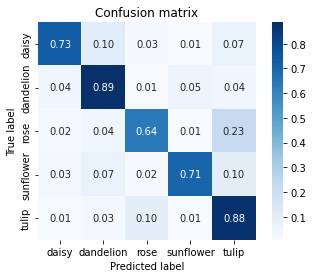

In [39]:
def show_confusion_matrix(test_labels, predictions):
  """Compute confusion matrix and normalize."""
  confusion = sk_metrics.confusion_matrix(
    np.argmax(test_labels, axis=1), predictions)
  confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)
  axis_labels = list(CLASSES.values())
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.2f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

show_confusion_matrix(batch_labels, test_prediction)

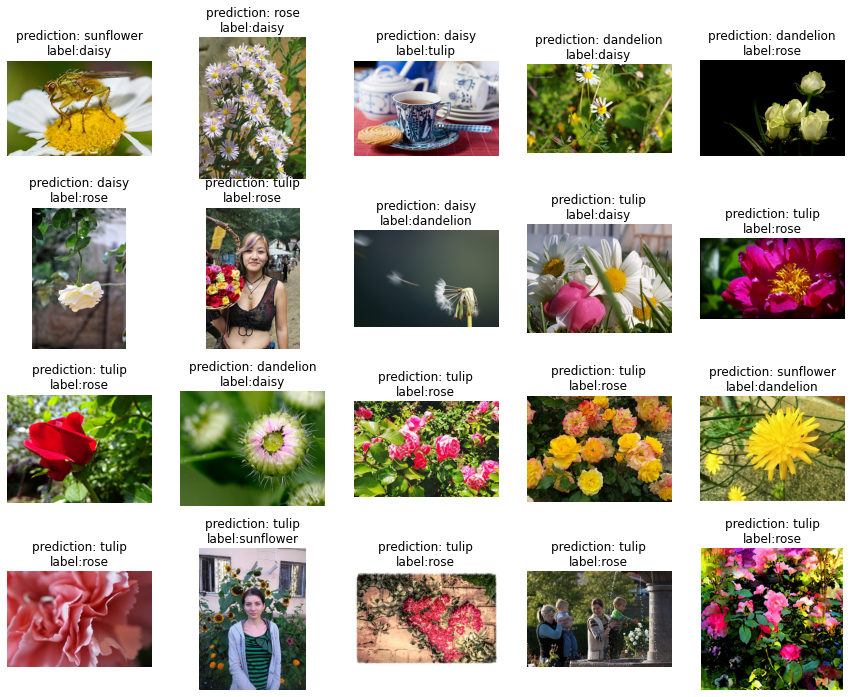

In [40]:
incorrect = [
    (example, CLASSES[prediction])
    for example, prediction, is_correct in zip(test_batch, test_prediction, correct_predicate)
    if not is_correct
]
display_images(
  [(get_image(example), "prediction: {0}\nlabel:{1}".format(incorrect_prediction, get_class(example)))
   for (example, incorrect_prediction) in incorrect[:20]])

In [41]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
  
from keras.models import load_model
  
model = load_model('flowers.h5')
  
image = load_img('/content/flowers/rose/10503217854_e66a804309.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
print("Predicted Class: ", label[0][0])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Predicted Class:  1.0


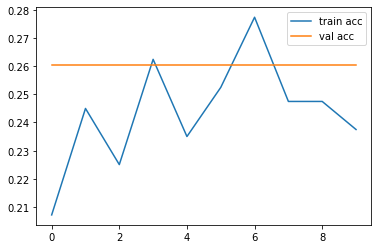

In [42]:
# accuracies
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.savefig('vgg-acc-rps-1.png')
plt.show()

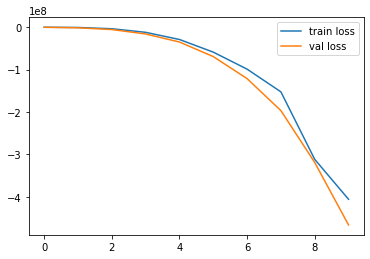

In [43]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()